In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data0 = pd.read_csv('mvd/MVD.csv')
data0

,Unnamed: 0,Title,video_id,LABEL,Topic,0bert,1bert,2bert,3bert,4bert,...,6graphcnn,7graphcnn,8graphcnn,9graphcnn,10graphcnn,11graphcnn,12graphcnn,13graphcnn,14graphcnn,15graphcnn
0,0,"Sad News For Dharmendra Fans, Dharmendra Death...",to8mQVw1Lso,Clickbait,Death,0.656415,-0.588487,0.255769,-0.457658,0.070014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Abhishek Bachchan and Shweta Bachchan in Koffe...,4N3hPrJLbEw,Clickbait,celebrity,0.442341,-0.153139,0.180063,-0.506507,0.685487,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,How To Get 6 Pack Abs In One Day,CfvUr6WAEWM,Clickbait,Health,0.189013,-0.487068,-0.017525,-0.428642,0.460981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Dirty Secrets of the Bachchan Family,i1rlytoxQ1o,Clickbait,celebrity,0.309474,-0.757419,-0.338226,-0.159227,0.707320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,10 Secret Wife of Bollywood Actors,jkytlp91onQ,Clickbait,celebrity,0.191653,-0.293305,0.015154,-0.505439,0.511239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,986,The Kapil Sharma Show - दी कपिल शर्मा शो-Ep-94...,4jZ-7xhLj-w,Real,NaN,0.219846,-0.444264,0.317631,-0.421029,0.431206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499,988,Cold War Between Lottery And Sarla - The Kapil...,L2rPcFB-bKg,Real,NaN,0.142554,-0.599347,0.047055,-0.120339,0.484493,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
500,989,England Queen's Wedding Shopping | Sargun Meht...,EPq2r8hUCBM,Real,NaN,0.230374,-0.681157,0.077860,-0.531160,0.515146,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501,990,Kapil Copies Dr. Gulati's Look - The Kapil Sha...,gPuxJYAuT_g,Real,NaN,-0.005640,-0.443048,-0.027411,-0.430937,0.478407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#Checking the shape of the dataset
data0 = data0.drop(['Unnamed: 0'], axis = 1).copy()
data0 = data0.drop(['Title'], axis = 1).copy()
data0 = data0.drop(['video_id'], axis = 1).copy()
data0 = data0.drop(['Topic'], axis = 1).copy()
#data0 = data0.drop(['targetParagraphs'], axis = 1).copy()
#data0 = data0.drop(['targetTitle'], axis = 1).copy()
#data0 = data0.drop(['postTimestamp'], axis = 1).copy()
#data0 = data0.drop(['targetKeywords'], axis = 1).copy()
#data0 = data0.drop(['targetDescription'], axis = 1).copy()
#data0 = data0.drop(['Unnamed: 0'], axis = 1).copy()
data0

,LABEL,0bert,1bert,2bert,3bert,4bert,5bert,6bert,7bert,8bert,...,6graphcnn,7graphcnn,8graphcnn,9graphcnn,10graphcnn,11graphcnn,12graphcnn,13graphcnn,14graphcnn,15graphcnn
0,Clickbait,0.656415,-0.588487,0.255769,-0.457658,0.070014,-0.430282,0.208616,0.499660,-0.069495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Clickbait,0.442341,-0.153139,0.180063,-0.506507,0.685487,-0.694880,0.302318,0.311490,-0.100956,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Clickbait,0.189013,-0.487068,-0.017525,-0.428642,0.460981,-0.412667,0.287481,0.204468,-0.091526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Clickbait,0.309474,-0.757419,-0.338226,-0.159227,0.707320,-0.499518,0.264550,0.264980,0.061713,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Clickbait,0.191653,-0.293305,0.015154,-0.505439,0.511239,0.054835,0.180687,0.030829,0.046616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,Real,0.219846,-0.444264,0.317631,-0.421029,0.431206,-0.506775,0.271254,0.163511,0.025984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499,Real,0.142554,-0.599347,0.047055,-0.120339,0.484493,-0.286151,-0.189977,0.274936,-0.436062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
500,Real,0.230374,-0.681157,0.077860,-0.531160,0.515146,-0.507808,0.250623,0.199079,-0.494489,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501,Real,-0.005640,-0.443048,-0.027411,-0.430937,0.478407,-0.239432,0.100175,0.254166,-0.252279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data0['LABEL'] = le.fit_transform(data0['LABEL'])
data0 = data.dropna()
data = data0

In [12]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)

In [13]:
# Sepratating & assigning features and target columns to X & y
y = data['LABEL']
X = data.drop(['LABEL'],axis=1)

In [14]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
fs = SelectKBest(score_func=f_classif, k=200)
X_selected=fs.fit_transform(X,y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [788 789 790 791 794 795 797 798 799 800 802] are constant.
  UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [15]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((398, 200), (100, 200))

In [16]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 5)
#tree.fit(X_train, y_train)
#y_pred_dc = tree.predict(X_test)
clf = make_pipeline(preprocessing.StandardScaler(), tree)
scores = cross_val_score(clf,X_selected,y, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.82 (+/- 0.05)


In [17]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=5)
#forest.fit(X_train, y_train)
#y_pred_rf = forest.predict(X_test)
#print('Random Forest: ' + (str)(accuracy_score(y_test,y_pred_rf)))
clf = make_pipeline(preprocessing.StandardScaler(), forest)
scores = cross_val_score(clf,X_selected,y, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.90 (+/- 0.04)


In [18]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))
#mlp.fit(X_train, y_train)
#y_pred_mlp = mlp.predict(X_test)
#print('MLP: ' + (str)(accuracy_score(y_test,y_pred_mlp)))
clf = make_pipeline(preprocessing.StandardScaler(), mlp)
scores = cross_val_score(clf,X_selected,y, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.94 (+/- 0.03)


In [19]:
#XGBoost Classification model
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#xgb.fit(X_train, y_train)
#y_pred_xgb = xgb.predict(X_test)
#print('XGB: ' + (str)(accuracy_score(y_test,y_pred_xgb)))
clf = make_pipeline(preprocessing.StandardScaler(), xgb)
scores = cross_val_score(clf,X_selected,y, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.90 (+/- 0.05)


In [20]:
#AdaBoost Classification model
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(learning_rate=0.4,random_state=7)
#ada.fit(X_train, y_train)
#y_pred_ada = ada.predict(X_test)
#print('ADA: ' + (str)(accuracy_score(y_test,y_pred_ada)))
clf = make_pipeline(preprocessing.StandardScaler(), ada)
scores = cross_val_score(clf,X_selected,y, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.90 (+/- 0.07)


In [21]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=0.4,max_depth=7)
#gb.fit(X_train, y_train)
#y_pred_gb = gb.predict(X_test)
clf = make_pipeline(preprocessing.StandardScaler(), gb)
scores = cross_val_score(clf,X_selected,y, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.83 (+/- 0.05)


In [22]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(learning_rate=0.4, depth=7)
#cat.fit(X_train, y_train)
#y_pred_cat = cat.predict(X_test)
clf = make_pipeline(preprocessing.StandardScaler(), cat)
scores = cross_val_score(clf,X_selected,y, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

0:	learn: 0.4388530	total: 333ms	remaining: 5m 32s
1:	learn: 0.2993314	total: 400ms	remaining: 3m 19s
2:	learn: 0.2177469	total: 463ms	remaining: 2m 33s
3:	learn: 0.1683327	total: 528ms	remaining: 2m 11s
4:	learn: 0.1299036	total: 893ms	remaining: 2m 57s
5:	learn: 0.1051225	total: 1.02s	remaining: 2m 49s
6:	learn: 0.0794595	total: 1.09s	remaining: 2m 34s
7:	learn: 0.0642266	total: 1.18s	remaining: 2m 25s
8:	learn: 0.0565633	total: 1.24s	remaining: 2m 16s
9:	learn: 0.0495228	total: 1.3s	remaining: 2m 8s
10:	learn: 0.0446569	total: 1.36s	remaining: 2m 2s
11:	learn: 0.0382856	total: 1.45s	remaining: 1m 59s
12:	learn: 0.0337196	total: 1.52s	remaining: 1m 55s
13:	learn: 0.0300298	total: 1.84s	remaining: 2m 9s
14:	learn: 0.0267022	total: 1.9s	remaining: 2m 4s
15:	learn: 0.0242574	total: 1.96s	remaining: 2m
16:	learn: 0.0214927	total: 2.02s	remaining: 1m 56s
17:	learn: 0.0197044	total: 2.13s	remaining: 1m 56s
18:	learn: 0.0176548	total: 2.2s	remaining: 1m 53s
19:	learn: 0.0158666	total: 2.26s

158:	learn: 0.0011658	total: 15.2s	remaining: 1m 20s
159:	learn: 0.0011635	total: 15.4s	remaining: 1m 20s
160:	learn: 0.0011634	total: 15.5s	remaining: 1m 20s
161:	learn: 0.0011633	total: 15.6s	remaining: 1m 20s
162:	learn: 0.0011506	total: 15.7s	remaining: 1m 20s
163:	learn: 0.0011506	total: 15.8s	remaining: 1m 20s
164:	learn: 0.0011505	total: 15.9s	remaining: 1m 20s
165:	learn: 0.0011505	total: 16s	remaining: 1m 20s
166:	learn: 0.0011504	total: 16s	remaining: 1m 20s
167:	learn: 0.0011501	total: 16.1s	remaining: 1m 19s
168:	learn: 0.0011501	total: 16.2s	remaining: 1m 19s
169:	learn: 0.0011398	total: 16.2s	remaining: 1m 19s
170:	learn: 0.0011398	total: 16.3s	remaining: 1m 19s
171:	learn: 0.0011398	total: 16.4s	remaining: 1m 18s
172:	learn: 0.0011314	total: 16.4s	remaining: 1m 18s
173:	learn: 0.0011310	total: 16.5s	remaining: 1m 18s
174:	learn: 0.0011310	total: 16.6s	remaining: 1m 18s
175:	learn: 0.0011185	total: 16.6s	remaining: 1m 17s
176:	learn: 0.0011184	total: 16.7s	remaining: 1m 1

318:	learn: 0.0009325	total: 27.1s	remaining: 57.8s
319:	learn: 0.0009324	total: 27.1s	remaining: 57.7s
320:	learn: 0.0009324	total: 27.4s	remaining: 57.9s
321:	learn: 0.0009300	total: 27.5s	remaining: 57.8s
322:	learn: 0.0009298	total: 27.5s	remaining: 57.7s
323:	learn: 0.0009298	total: 27.6s	remaining: 57.5s
324:	learn: 0.0009298	total: 27.7s	remaining: 57.5s
325:	learn: 0.0009233	total: 27.7s	remaining: 57.3s
326:	learn: 0.0009232	total: 27.8s	remaining: 57.2s
327:	learn: 0.0009179	total: 27.9s	remaining: 57.1s
328:	learn: 0.0009176	total: 27.9s	remaining: 57s
329:	learn: 0.0009176	total: 28s	remaining: 56.8s
330:	learn: 0.0009175	total: 28.1s	remaining: 56.7s
331:	learn: 0.0009174	total: 28.1s	remaining: 56.6s
332:	learn: 0.0009161	total: 28.5s	remaining: 57.2s
333:	learn: 0.0009160	total: 28.6s	remaining: 57s
334:	learn: 0.0009160	total: 28.7s	remaining: 56.9s
335:	learn: 0.0009158	total: 28.7s	remaining: 56.8s
336:	learn: 0.0009158	total: 28.8s	remaining: 56.7s
337:	learn: 0.0009

477:	learn: 0.0008659	total: 40.5s	remaining: 44.2s
478:	learn: 0.0008659	total: 40.6s	remaining: 44.1s
479:	learn: 0.0008659	total: 40.7s	remaining: 44.1s
480:	learn: 0.0008658	total: 40.8s	remaining: 44s
481:	learn: 0.0008656	total: 41s	remaining: 44.1s
482:	learn: 0.0008656	total: 41.1s	remaining: 44s
483:	learn: 0.0008656	total: 41.3s	remaining: 44s
484:	learn: 0.0008655	total: 41.3s	remaining: 43.9s
485:	learn: 0.0008654	total: 41.4s	remaining: 43.8s
486:	learn: 0.0008653	total: 41.5s	remaining: 43.7s
487:	learn: 0.0008652	total: 41.5s	remaining: 43.6s
488:	learn: 0.0008651	total: 41.6s	remaining: 43.5s
489:	learn: 0.0008650	total: 41.7s	remaining: 43.4s
490:	learn: 0.0008646	total: 41.7s	remaining: 43.3s
491:	learn: 0.0008646	total: 41.8s	remaining: 43.2s
492:	learn: 0.0008646	total: 41.9s	remaining: 43.1s
493:	learn: 0.0008645	total: 42.1s	remaining: 43.1s
494:	learn: 0.0008608	total: 42.3s	remaining: 43.2s
495:	learn: 0.0008608	total: 42.5s	remaining: 43.1s
496:	learn: 0.000860

638:	learn: 0.0008098	total: 57.2s	remaining: 32.3s
639:	learn: 0.0008096	total: 57.4s	remaining: 32.3s
640:	learn: 0.0008096	total: 57.4s	remaining: 32.2s
641:	learn: 0.0008096	total: 57.5s	remaining: 32.1s
642:	learn: 0.0008095	total: 57.6s	remaining: 32s
643:	learn: 0.0008090	total: 57.7s	remaining: 31.9s
644:	learn: 0.0008089	total: 57.8s	remaining: 31.8s
645:	learn: 0.0008088	total: 57.9s	remaining: 31.8s
646:	learn: 0.0008087	total: 58s	remaining: 31.7s
647:	learn: 0.0008086	total: 58.1s	remaining: 31.6s
648:	learn: 0.0008085	total: 58.3s	remaining: 31.5s
649:	learn: 0.0008084	total: 58.3s	remaining: 31.4s
650:	learn: 0.0008083	total: 58.4s	remaining: 31.3s
651:	learn: 0.0008083	total: 58.5s	remaining: 31.2s
652:	learn: 0.0008083	total: 58.7s	remaining: 31.2s
653:	learn: 0.0008079	total: 58.8s	remaining: 31.1s
654:	learn: 0.0008078	total: 58.9s	remaining: 31s
655:	learn: 0.0008078	total: 59s	remaining: 30.9s
656:	learn: 0.0008078	total: 59.1s	remaining: 30.8s
657:	learn: 0.000807

799:	learn: 0.0007812	total: 1m 8s	remaining: 17.1s
800:	learn: 0.0007812	total: 1m 8s	remaining: 17s
801:	learn: 0.0007812	total: 1m 8s	remaining: 16.9s
802:	learn: 0.0007811	total: 1m 8s	remaining: 16.8s
803:	learn: 0.0007810	total: 1m 8s	remaining: 16.7s
804:	learn: 0.0007810	total: 1m 8s	remaining: 16.6s
805:	learn: 0.0007810	total: 1m 8s	remaining: 16.6s
806:	learn: 0.0007810	total: 1m 8s	remaining: 16.5s
807:	learn: 0.0007785	total: 1m 8s	remaining: 16.4s
808:	learn: 0.0007785	total: 1m 9s	remaining: 16.3s
809:	learn: 0.0007785	total: 1m 9s	remaining: 16.2s
810:	learn: 0.0007785	total: 1m 9s	remaining: 16.1s
811:	learn: 0.0007785	total: 1m 9s	remaining: 16s
812:	learn: 0.0007785	total: 1m 9s	remaining: 15.9s
813:	learn: 0.0007784	total: 1m 9s	remaining: 15.8s
814:	learn: 0.0007784	total: 1m 9s	remaining: 15.7s
815:	learn: 0.0007784	total: 1m 9s	remaining: 15.6s
816:	learn: 0.0007783	total: 1m 9s	remaining: 15.6s
817:	learn: 0.0007783	total: 1m 9s	remaining: 15.5s
818:	learn: 0.00

955:	learn: 0.0007516	total: 1m 19s	remaining: 3.67s
956:	learn: 0.0007516	total: 1m 19s	remaining: 3.59s
957:	learn: 0.0007516	total: 1m 19s	remaining: 3.5s
958:	learn: 0.0007515	total: 1m 19s	remaining: 3.42s
959:	learn: 0.0007515	total: 1m 20s	remaining: 3.33s
960:	learn: 0.0007515	total: 1m 20s	remaining: 3.25s
961:	learn: 0.0007514	total: 1m 20s	remaining: 3.17s
962:	learn: 0.0007514	total: 1m 20s	remaining: 3.08s
963:	learn: 0.0007514	total: 1m 20s	remaining: 3s
964:	learn: 0.0007513	total: 1m 20s	remaining: 2.92s
965:	learn: 0.0007513	total: 1m 20s	remaining: 2.83s
966:	learn: 0.0007513	total: 1m 20s	remaining: 2.75s
967:	learn: 0.0007512	total: 1m 20s	remaining: 2.67s
968:	learn: 0.0007512	total: 1m 20s	remaining: 2.58s
969:	learn: 0.0007511	total: 1m 20s	remaining: 2.5s
970:	learn: 0.0007511	total: 1m 21s	remaining: 2.42s
971:	learn: 0.0007510	total: 1m 21s	remaining: 2.34s
972:	learn: 0.0007510	total: 1m 21s	remaining: 2.26s
973:	learn: 0.0007508	total: 1m 21s	remaining: 2.17

114:	learn: 0.0013172	total: 8.9s	remaining: 1m 8s
115:	learn: 0.0013015	total: 9s	remaining: 1m 8s
116:	learn: 0.0013011	total: 9.12s	remaining: 1m 8s
117:	learn: 0.0012964	total: 9.22s	remaining: 1m 8s
118:	learn: 0.0012948	total: 9.29s	remaining: 1m 8s
119:	learn: 0.0012947	total: 9.36s	remaining: 1m 8s
120:	learn: 0.0012946	total: 9.42s	remaining: 1m 8s
121:	learn: 0.0012823	total: 9.48s	remaining: 1m 8s
122:	learn: 0.0012725	total: 9.6s	remaining: 1m 8s
123:	learn: 0.0012724	total: 9.73s	remaining: 1m 8s
124:	learn: 0.0012582	total: 9.88s	remaining: 1m 9s
125:	learn: 0.0012513	total: 9.96s	remaining: 1m 9s
126:	learn: 0.0012513	total: 10s	remaining: 1m 8s
127:	learn: 0.0012509	total: 10.1s	remaining: 1m 8s
128:	learn: 0.0012359	total: 10.2s	remaining: 1m 8s
129:	learn: 0.0012356	total: 10.3s	remaining: 1m 9s
130:	learn: 0.0012355	total: 10.4s	remaining: 1m 9s
131:	learn: 0.0012233	total: 10.5s	remaining: 1m 9s
132:	learn: 0.0012232	total: 10.6s	remaining: 1m 9s
133:	learn: 0.00122

KeyboardInterrupt: 

In [23]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(multi_class="multinomial", solver="newton-cg")
#lor.fit(X_train, y_train)
#y_pred_lor = lor.predict(X_test)
clf = make_pipeline(preprocessing.StandardScaler(), lor)
scores = cross_val_score(clf,X_selected,y, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.93 (+/- 0.04)


In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
#bnb.fit(X_train, y_train)
#y_pred_bnb = bnb.predict(X_test)
clf = make_pipeline(preprocessing.StandardScaler(), bnb)
scores = cross_val_score(clf,X_selected,y, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [25]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
#gnb.fit(X_train, y_train)
#y_pred_gnb = gnb.predict(X_test)
clf = make_pipeline(preprocessing.StandardScaler(), gnb)
scores = cross_val_score(clf,X_selected,y, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.81 (+/- 0.07)


In [24]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=12)
#svm.fit(X_train, y_train)
#y_pred_svm = svm.predict(X_test)
clf = make_pipeline(preprocessing.StandardScaler(), svm)
scores = cross_val_score(clf,X_selected,y, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.93 (+/- 0.04)


dict = {'Decision Tree':y_pred_dc, 'Random Forest':y_pred_rf, 'MLP':y_pred_mlp, 'XGB':y_pred_xgb, 'ADA':y_pred_ada,'Gradient Boost':y_pred_gb, 'Cat Boost':y_pred_cat, 'Log Reg':y_pred_lor, 'Bern NB': y_pred_bnb, 'Gaussian NB':y_pred_gnb, 'SVM':y_pred_svm, 'Label':y_test}
df1 = pd.DataFrame(dict)

y1 = df1['Label']
X1 = df1.drop(['Label'],axis=1)
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 12)
X1_train.shape, X1_test.shape

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
forest = RandomForestClassifier(max_depth=5)
forest.fit(X1_train, y1_train)
y1_test_forest = forest.predict(X1_test)
acc1_test_forest = accuracy_score(y1_test,y1_test_forest)
print("Random forest: Accuracy on test Data: {:.3f}".format(acc1_test_forest))

from statistics import mode
from sklearn.metrics import accuracy_score 
y_pred_maj = []
for i in range(y_pred_xgb.size):
    y_maj = []
    y_maj.append(y_pred_dc[i])
    y_maj.append(y_pred_rf[i])
    y_maj.append(y_pred_mlp[i])
    y_maj.append(y_pred_xgb[i])
    y_maj.append(y_pred_ada[i])
    y_maj.append(y_pred_gb[i])
    y_maj.append(y_pred_cat[i])
    y_maj.append(y_pred_lor[i])
    y_maj.append(y_pred_bnb[i])
    y_maj.append(y_pred_gnb[i])
    y_maj.append(y_pred_svm[i])
    y_pred_maj.append(mode(y_maj))
print(accuracy_score(y_test,y_pred_maj))

print('Decision Tree: ' + (str)(accuracy_score(y_test,y_pred_dc)))
print('Random Forest: ' + (str)(accuracy_score(y_test,y_pred_rf)))
print('MLP: ' + (str)(accuracy_score(y_test,y_pred_mlp)))
print('XGB: ' + (str)(accuracy_score(y_test,y_pred_xgb)))
print('ADA: ' + (str)(accuracy_score(y_test,y_pred_ada)))
print('Gradient Boost: ' + (str)(accuracy_score(y_test,y_pred_gb)))
print('Cat Boost: ' + (str)(accuracy_score(y_test,y_pred_cat)))
print('Log Reg: ' + (str)(accuracy_score(y_test,y_pred_lor)))
print('Bern NB: ' + (str)(accuracy_score(y_test,y_pred_bnb)))
print('Gaussian NB: ' + (str)(accuracy_score(y_test,y_pred_gnb)))
print('SVM: ' + (str)(accuracy_score(y_test,y_pred_svm)))
print("Random forest Stacking: " + (str)(acc1_test_forest))
print('Majority Voting: ' + (str)(accuracy_score(y_test,y_pred_maj)))

In [26]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

def evaluate_model(model, X, y):
    clf = make_pipeline(preprocessing.StandardScaler(), model)
    scores = cross_val_score(clf,X,y, cv = 5)
    return scores

def get_stacking():
    level0 = list()
    level0.append(('lr', LogisticRegression(multi_class="multinomial", solver="newton-cg")))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('xgb', XGBClassifier(learning_rate=0.4,max_depth=7)))
    level0.append(('svm', SVC(kernel='linear', C=1.0, random_state=12)))
    level0.append(('bayes', GaussianNB()))
    level1 = forest = RandomForestClassifier(max_depth=5)
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

stacking_model = get_stacking()
print (evaluate_model(stacking_model, X_selected, y))

[0.97       0.94       0.9        0.98989899 0.92929293]


from statistics import mean, stdev 
from sklearn import preprocessing 
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import classification_report
from sklearn import linear_model 
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
lst_accu_stratified = [] 
scaler = preprocessing.MinMaxScaler() 
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(multi_class="multinomial", solver="newton-cg")
x_scaled = scaler.fit_transform(X_selected)
for train_index, test_index in skf.split(X_selected, y): 
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    lor.fit(x_train_fold, y_train_fold) 
    y_pred_fold = lor.predict(x_test_fold)
    lst_accu_stratified.append(lor.score(x_test_fold, y_test_fold))
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nOverall Accuracy:', 
      mean(lst_accu_stratified)*100, '%') 
print('\nStandard Deviation is:', stdev(lst_accu_stratified))
print(classification_report(y_test_fold, y_pred_fold))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from mlxtend.classifier import StackingCVClassifier
from sklearn import metrics

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, 
                                                    test_size = 0.2, random_state = 12)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

RANDOM_SEED = 42
clf1 = KNeighborsClassifier(n_neighbors=1)
clf3 = GaussianNB()
clf2 = LogisticRegression(max_iter=1000)
clf4 = XGBClassifier(learning_rate=0.4,max_depth=7)
clf5 = SVC(kernel='linear', C=1.0, random_state=12)
forest = RandomForestClassifier(max_depth=7)

sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5], 
                            meta_classifier=forest,
                            random_state=42)

params = {'kneighborsclassifier__n_neighbors': [1, 5],
          'logisticregression__C': [0.1, 10.0],
          'meta_classifier__n_estimators': [200, 500],
          'meta_classifier__max_features': ['auto', 'sqrt', 'log2'],
          'meta_classifier__max_depth' : [4,5,6,7,8],
          'meta_classifier__criterion' : ['gini', 'entropy']}

grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=5,
                    refit=True)

grid.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(grid.best_params_)    
y_true, y_pred = y_test, grid.predict(X_test)   
auc = metrics.roc_auc_score(y_test, y_pred)
acc = metrics.accuracy_score(y_test,y_pred)
print("\nAccuracy: ", acc)
print("\n")
print(f"AUC of stack {combo}: {auc:.3f}")

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

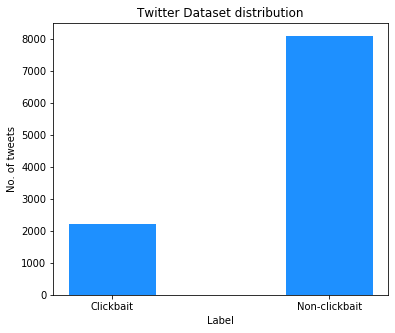

In [17]:
import numpy as np 
import matplotlib.pyplot as plt  
  

# creating the dataset 
data = {'Clickbait': 2215, 'Non-clickbait':8091} 
label = list(data.keys()) 
frequency = list(data.values()) 
   
fig = plt.figure(figsize = (6, 5)) 
  
# creating the bar plot 
plt.bar(label, frequency, color ='dodgerblue',  
        width = 0.4) 
  
plt.xlabel("Label") 
plt.ylabel("No. of tweets") 
plt.title("Twitter Dataset distribution") 
plt.savefig("Twitter data distribution")
plt.show()

In [9]:
data0['truthClass'].value_counts()

1    8091
0    2215
Name: truthClass, dtype: int64